# Downloading Data Based on Seeing

In [1]:
import matplotlib.pyplot as plt
from sunpy.net import Fido, attrs as a

import dkist
import dkist.net

Let's find a dataset with the highest average value of r0 (this is bad?).
First we'll search for all unembargoed VISP data, as embargoed data is no use to us for this excercise.

In [45]:
res = Fido.search(a.Instrument("VISP"), a.dkist.Embargoed(False))

Next, since we want to use the highest average $r_0$, we can have Fido sort the results and output just the useful columns.

In [46]:
res["dkist"].sort("Average Fried Parameter", reverse=True)
res["dkist"].show("Dataset ID", "Average Fried Parameter")

Dataset ID,Average Fried Parameter
str5,float64
BEOGN,6.396623914771764
BZWKJ,1.8344233588568228
ADWOK,1.8344233588568228
...,...
AKNGW,0.08793694602367085
BKNMW,0.0871138009579903
BJNKP,0.0871138009579903
AGLKO,0.0532291613649084


In [ ]:
res = res["dkist"]

In [51]:
res[res["Average Fried Parameter"] < 0.2]["Dataset ID", "Average Fried Parameter"]

Dataset ID,Average Fried Parameter
str5,float64
AJNEP,0.14379226508499265
AGNWO,0.14379226508499265
BRWJV,0.14324949289555358
...,...
AKNGW,0.08793694602367085
BKNMW,0.0871138009579903
BJNKP,0.0871138009579903
AGLKO,0.0532291613649084


In [52]:
a.dkist.FriedParameter?

In [54]:
import astropy.units as u

In [60]:
rr = Fido.search(a.Instrument("VISP"), a.dkist.FriedParameter(0, 0.2))
rr.show("Dataset ID", "Average Fried Parameter")

Dataset ID,Average Fried Parameter
str5,float64
BDWQK,0.09144699104186786
AYDEW,0.09165082528563988
BLGOX,0.11345711420611478
...,...
AJDPR,0.11160695487179882
BVOEW,0.06438792896409745
BRWMK,0.049344321021969124
AVOZR,0.049344321021969124


In [61]:
a.Instrument

Attribute Name,Client,Full Name,Description
aia,VSO,AIA,Atmospheric Imaging Assembly
bcs,VSO,BCS,Bragg Crystal Spectrometer
be_continuum,VSO,BE-Continuum,INAF-OACT Barra Equatoriale Continuum Instrument
be_halpha,VSO,BE-Halpha,INAF-OACT Barra Equatoriale Hα Instrument
bigbear,VSO,Big Bear,"Big Bear Solar Observatory, California TON and GONG+ sites"
caii,VSO,CAII,Kanzelhöhe Ca II k Instrument
cds,VSO,CDS,Coronal Diagnostic Spectrometer
celias,VSO,CELIAS,"Charge, Element, and Isotope Analysis System"
cerrotololo,VSO,Cerro Tololo,"Cerro Tololo, Chile GONG+ site"
cook,VSO,Cook,None


This gives us the dataset `BEOGN`.
We can download the dataset ASDF with Fido to inspect it in more detail.
Remember that this only downloads a single ASDF file with some more metadata about the dataset, not the actual science data.

In [44]:
asdf_files = Fido.fetch(res["dkist"][0], path="~/sunpy/data/{dataset_id}")
ds = dkist.Dataset.from_asdf(asdf_files[0])

KeyError: 'dkist'

Now that we have access to the FITS headers we can inspect the $r_0$ more closely, just as we did in the previous session.
Remember that `DINDEX4` is the Stokes index, so we can plot the $r_0$ for just Stokes I like so:

In [10]:
ds.headers["DINDEX4"] == 1

array([ True,  True,  True, ..., False, False, False])

Now let's slice down our dataset based on the first frame where $r_0$ is high:

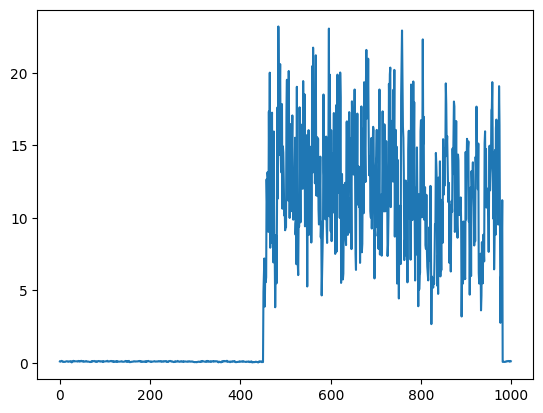

In [12]:
plt.plot(ds.headers[ds.headers["DINDEX4"] == 1]["ATMOS_R0"])

In [32]:
bad_headers = ds.headers[ds.headers["ATMOS_R0"] > 1]

In [33]:
bad_headers.sort("DATE-AVG")

In [34]:
sds = ds[0, :bad_headers[0]["DINDEX3"]-1, :, :]

We can now download only these files, remember you need globus-connect-personal running for this.

In [36]:
sds.files.download(wait=False)

|                                                                                                             …

PENDING: Starting Transfer
GC_NOT_CONNECTED: The Globus Connect Personal endpoint 'dolgoch (1dee6bf6-06bf-11ed-991c-0d984f5c8c77)' is not currently connected to Globus
Cancelling Task


Now let's plot the Stokes I data at some wavelength:

In [ ]:
ds[0, :, 466, :].plot()

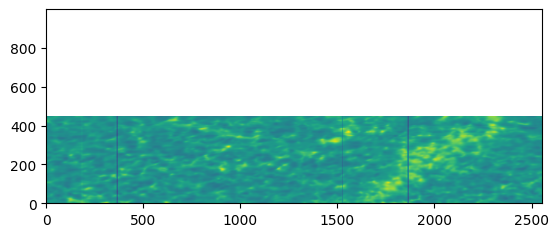

In [38]:
plt.imshow(ds[0, :, 466, :].data, origin="lower")

You will notice that a lot of it is missing.
This is because we have deliberately only downloaded those frames with an acceptably low $r_0$.
You may also notice though, that the `Dataset` object continues to function normally without the rest of the data.
When we try to access the data, if the file is missing then `Dataset` fills in the corresponding portions of the array with NaNs.

Since the seeing is bad for a significant contiguous portion of the data, we may simply want to discount that part and look only at the useful data.
In this case we can use the sub-dataset we made earlier:

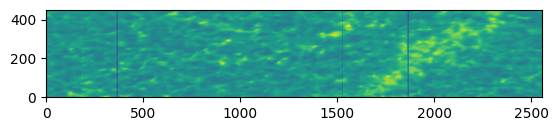

In [39]:
plt.imshow(sds[:, 466, :].data, origin="lower")

Or of course we can make any arbitrary slice to look at whatever subset of the data we prefer.